# Challenge 3

In [1]:
# import libraries here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

#### Import the titanic file. Name your dataset `titanic`.

In [2]:
titanic = pd.read_csv('./titanic.csv',low_memory=False)
titanic.head()

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,U0,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,U0,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,U0,S


#### Explore the titanic dataset using Pandas dtypes

In [3]:
#your code here
titanic.dtypes

PassengerId      int64
Survived       float64
Pclass           int64
Name            object
Gender          object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

#### What are your numerical variables? What are your categorical variables?

*Hint: Use Pandas `select_dtypes`*

In [4]:
# your code here- numerical variable
titanic.select_dtypes(exclude=['object']).head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0.0,3,22.0,1,0,7.2500
1,2,1.0,1,38.0,1,0,71.2833
2,3,1.0,3,26.0,0,0,7.9250
3,4,1.0,1,35.0,1,0,53.1000
4,5,0.0,3,35.0,0,0,8.0500


In [5]:
#your code here- categorical variable
titanic.select_dtypes(include=['object']).head()

,Name,Gender,Ticket,Cabin,Embarked
0,"Braund, Mr. Owen Harris",male,A/5 21171,U0,S
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C85,C
2,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,U0,S
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,C123,S
4,"Allen, Mr. William Henry",male,373450,U0,S


#### Set the plot style to `classic` and the figure size to `(12,6)`

*Hint: To set the style you can use `matplotlib.pyplot` functions or seaborn*

In [6]:
# your code here
plt.style.use('classic')
sns.set_style('whitegrid')
plt.rcParams["figure.figsize"] = (12,6)
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['lines.linestyle'] = '--'

#### Use the appropriate visulalization to show the distribution of the column `Age`

Como vemos ambos codigos sacan el histograma, sin embargo el segundo no saca los arr de x e y, por lo tanto en este caso es mas eficiente.

Text(0.5, 0, 'Age')

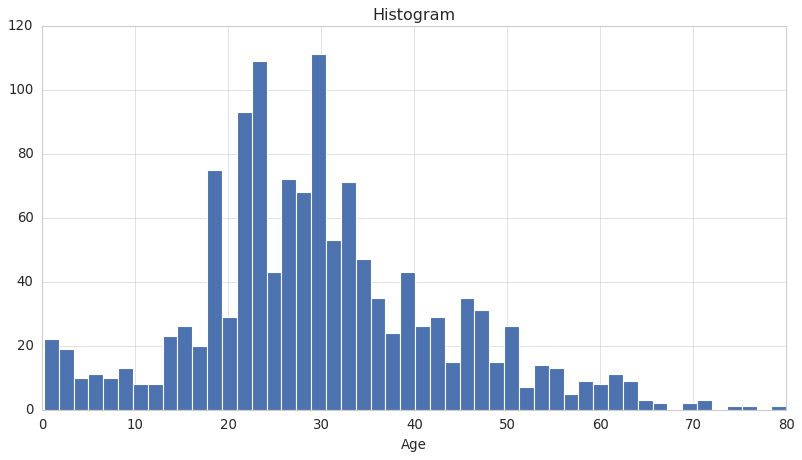

In [7]:
#plt.hist(titanic.Age, histtype="bar",bins=50)
titanic.Age.hist(bins=50)
plt.title("Histogram")
plt.xlabel("Age")

#### Use subplots to plot the distribution of the `Age` variable with bins equal to `10`, `20` and `50`.

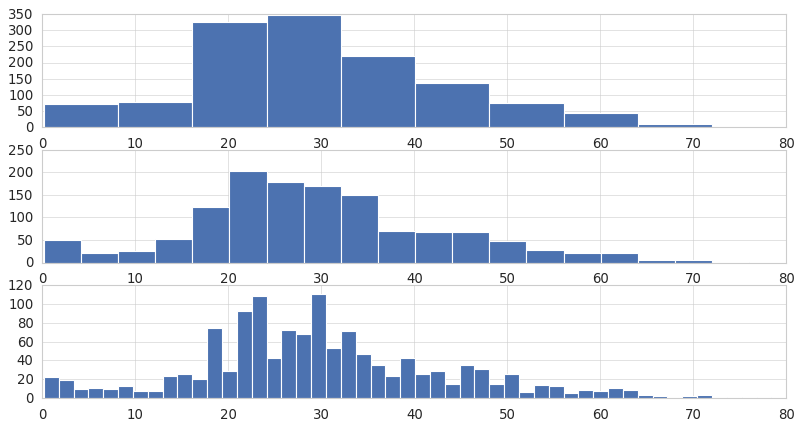

In [12]:
# your code here
#en este caso modificamos las ax, en lugar de 1,3 --> 3,1 ya que queda mas claro en este caso
fig, ax = plt.subplots(3,1)

plt.sca(ax[0])
titanic.Age.hist(bins=10)

plt.sca(ax[1])
titanic.Age.hist(bins=20)

plt.sca(ax[2])
titanic.Age.hist(bins=50)

#### Whether the bin size affects your plot? Why?

Si. Las bins son basicamente la suma de las veces que aparece cada edad, es decir un groupby edad sum edad.
Por tanto, al usar mas o menos bins estas agrupaciones cambiaran el grafico y lo veremos mas o menos claro.
Para este tipo de grafica, seaborn nos puede servir como un indicador mejor, ya que automaticamente calcula el numero ideal de bins, que este caso son unas 40.

#### Use seaborn to show the distribution of the column `Age`

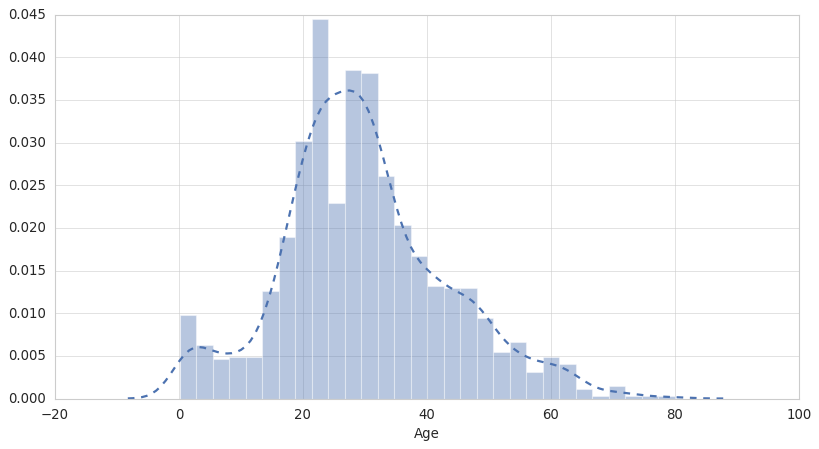

In [14]:
# your code here
sns.distplot(titanic["Age"])

#### Use the appropriate plot to visualize the column `Gender`. There are 2 ways of doing it. Do it both ways.

*Hint: Use matplotlib and seaborn*

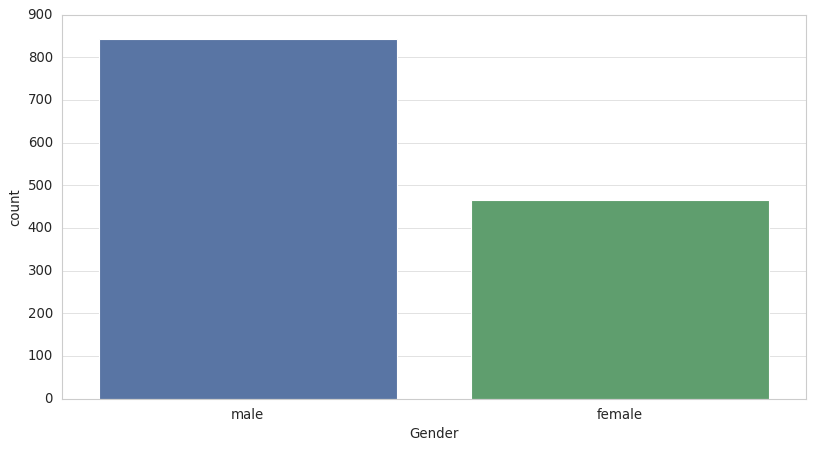

In [40]:
# your code here- 1st way
#sns.barplot("Gender", "PassengerId", data=titanic, estimator=titanic.PassengerId.count())
#'numpy.int64' object is not callable --> con la funcion previa me da este error y no entiendo por que, ya que
#sum lo acepta

sns.countplot(x='Gender',data=titanic)

"titanic['Gender'].value_counts().plot(kind='bar')\nplt.xlabel('Gender')\nplt.ylabel('Count')"

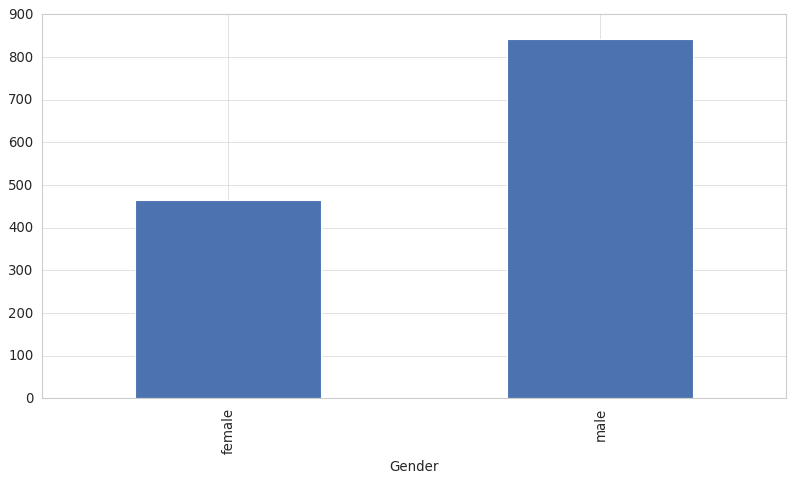

In [37]:
# your code here- 2nd way
#agrupando
group_gender = titanic.PassengerId.groupby(titanic.Gender).count()

group_gender.plot.bar()

#sin agrupar
"""titanic['Gender'].value_counts().plot(kind='bar')
plt.xlabel('Gender')
plt.ylabel('Count')"""

#### Use the appropriate plot to visualize the column `Pclass` 


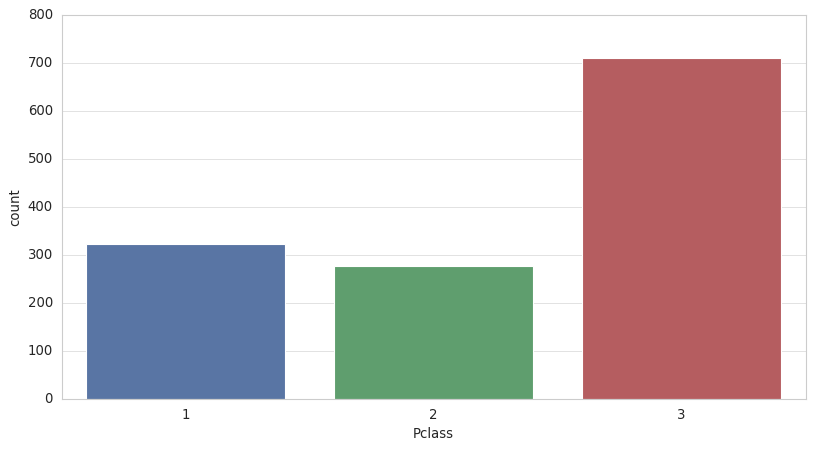

In [41]:
# your code here
sns.countplot(x='Pclass',data=titanic)

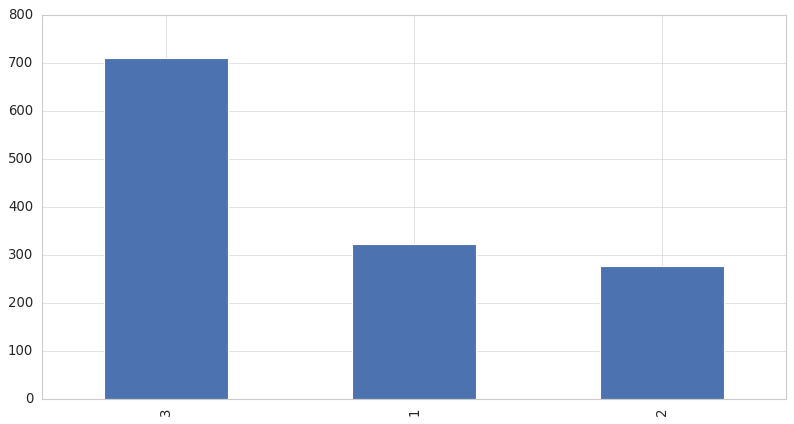

In [52]:
titanic['Pclass'].value_counts().plot(kind='bar')

#### We would like to have in one single plot the summary statistics of the feature `Age`. Choose the appropriate plot to show below.

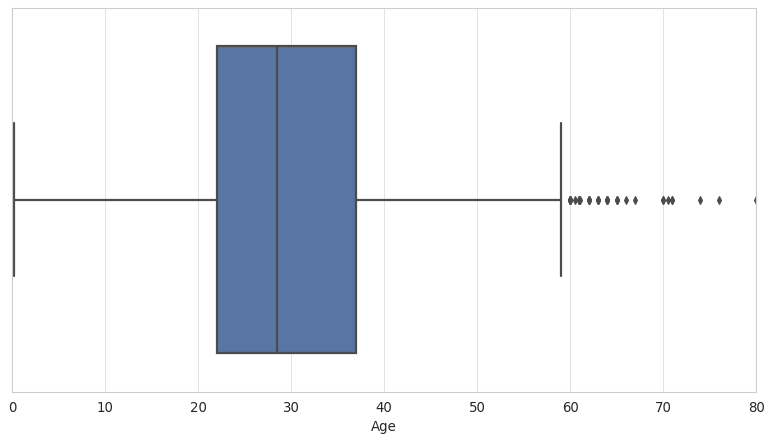

In [43]:
# your code here
sns.boxplot("Age", data=titanic, orient="h")

{'whiskers': [<matplotlib.lines.Line2D at 0x7fc303d80dd0>,
 'caps': [<matplotlib.lines.Line2D at 0x7fc303cb3c90>,
 'boxes': [<matplotlib.patches.PathPatch at 0x7fc303cbef50>],
 'medians': [<matplotlib.lines.Line2D at 0x7fc303cd1d10>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fc303cd87d0>],
 'means': [<matplotlib.lines.Line2D at 0x7fc303cccd90>]}

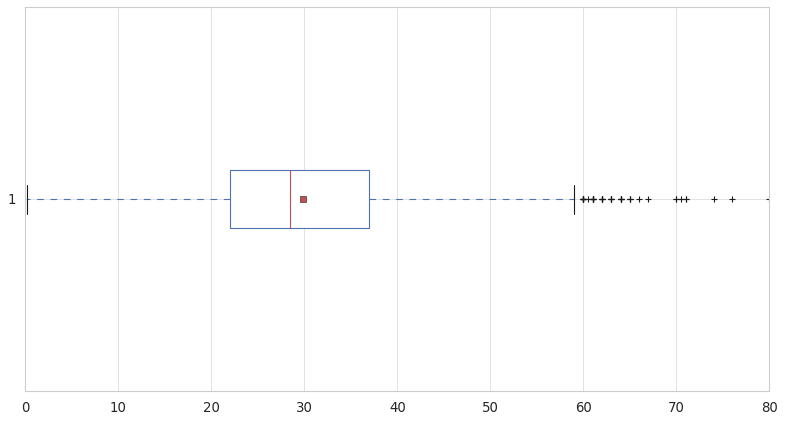

In [48]:
plt.boxplot(titanic["Age"], vert=False, patch_artist=True, showmeans=True)
#titanic.boxplot(column="Age",vert=False, patch_artist=True, showmeans=True)

#### What does the previous plot tell you about the feature `Age`? Comment.

Nos dice que la media de edad es 30, la mediana esta algo por debajo y y que el 75% de las personas no pasan de 59 años. Por otro lado, hay unos pocos outliers mayores de 60, lo que hacen que la media sea algo superior a la mediana.

#### Now in addition to the summary statistics, we also want to visualize the distribution of `Age`. Choose the appropriate plot to sow below.

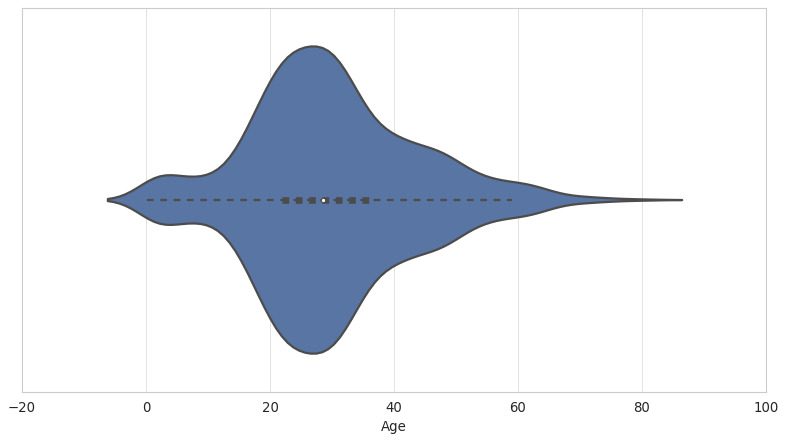

In [54]:
#your code here
sns.violinplot("Age", data=titanic)


#### What additional information in the previous plot provide you about the feature `Age`? Comment.

Nos da de una manera mas visual la misma info dada en boxplot. Por que? Porque la mediana en si ya indica que la mayoria de los valores se concentran en ese punto dado.

#### We suspect that there is a linear relationship between `Fare` and `Age`. Use the appropriate plot to show the relationship between these 2 features. There are 2 ways, please do it both ways.

*Hint: One of the ways involves using Seaborn*

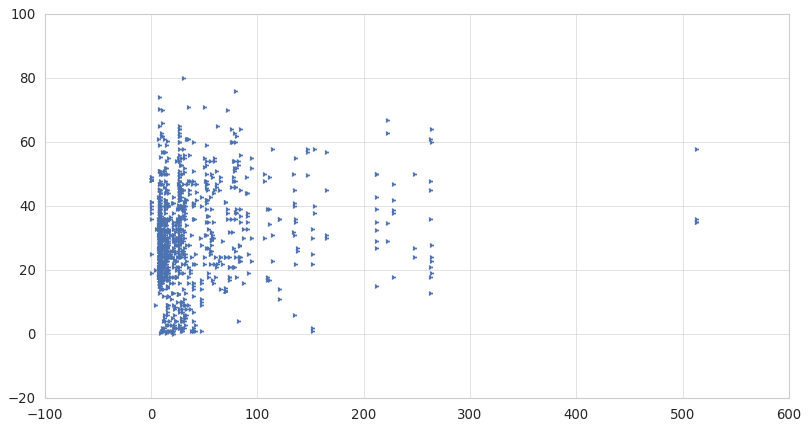

In [58]:
plt.scatter(titanic.Fare,titanic.Age, lw=1.5, alpha=1, marker="4")

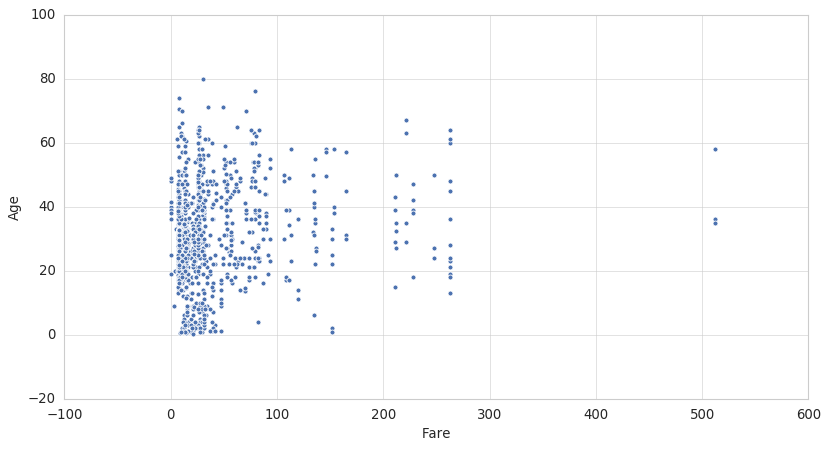

In [55]:
#your code-1st way
sns.scatterplot("Fare","Age", data=titanic)

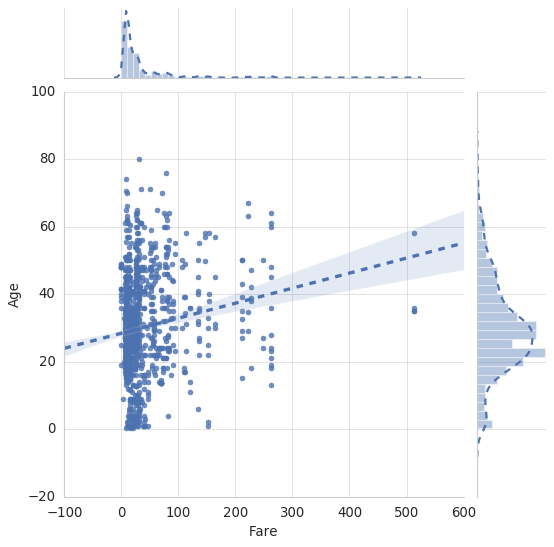

In [56]:
# your code-2nd way
sns.jointplot("Fare","Age", data=titanic, kind="reg", height=7, dropna=True)

#### Using Seaborn plot the correlation matrix of various features.

*Hint: search how to use `heatmap`*

Text(0.5, 1, 'Correlation matrix')

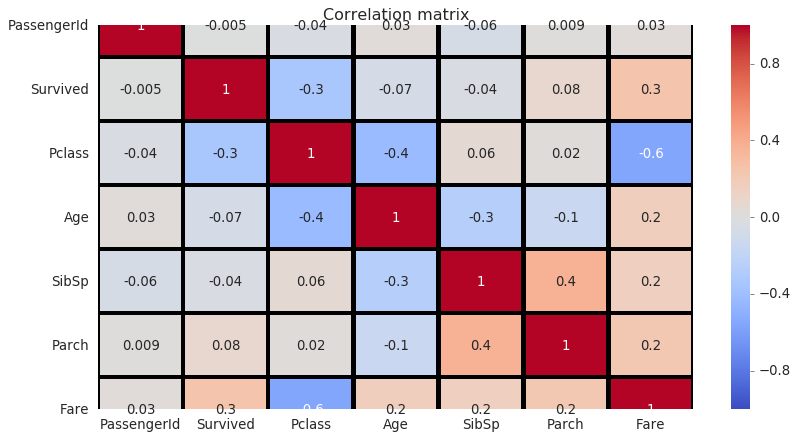

In [86]:
sns.heatmap(titanic.corr(),annot = True, fmt='.1g', vmin=-1, vmax=1, center= 0, cmap= 'coolwarm' , linewidths=3, linecolor='black')
plt.title('Correlation matrix')

#### According to the previous plot, what are the most correlated feature? Comment.

Fare and Pclass with a neg corr of -0.6

#### Use the appropriate plot to display the summary statistics of the `Age` in function of the `Pclass`.

*Hint: use boxplot to display summary statistics of `Age` in relation to each of the discrete values of `Pclass`*

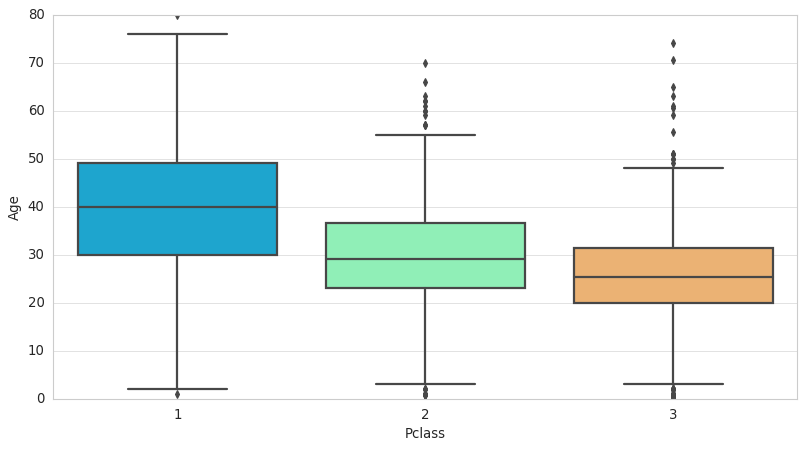

In [60]:
#your code here
sns.boxplot('Pclass','Age',data=titanic,palette='rainbow')

#### Use the appropriate plot to display the distributions of  `Age` in relation to  `Gender`.

*Hint: use Facetgrid to display the distribution of `Age` for each categorical value of `Gender`*

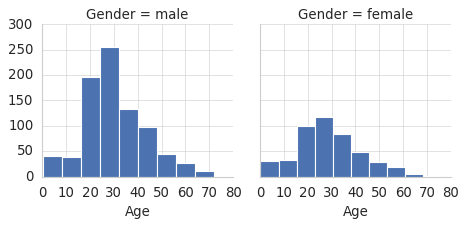

In [63]:
#your code here
g = sns.FacetGrid(data=titanic,col='Gender')
g.map(plt.hist,'Age')